In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from tqdm.auto import tqdm

# Circle

In [33]:
from sklearn import datasets

n_samples = 1000
X, _ = datasets.make_circles(n_samples=n_samples, factor=0.3, noise=0.05, random_state=42, shuffle=False)
X = X[:n_samples//2]

blob, _ = datasets.make_blobs(n_samples=500, n_features=2, 
                              centers=[(0.7,0.7), (-0.7, -0.7)], cluster_std=(0.1, 0.1), shuffle=False)

X = np.concatenate((X, blob))

print(X.shape)

(1000, 2)


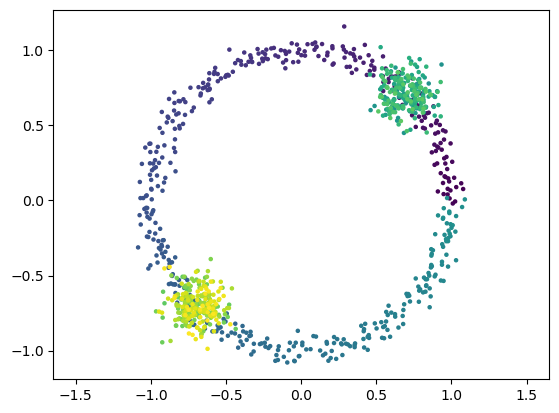

In [47]:
plt.scatter(X[:,0], X[:,1], s=5, c=[i for i in range(len(X))])
plt.axis('equal')
plt.show()

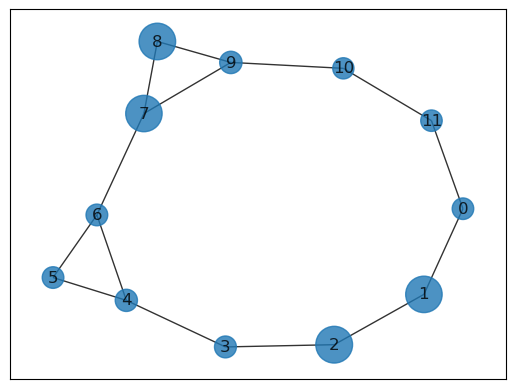

In [48]:
from pyballmapper import BallMapper

full_bm = BallMapper(X = X,
                     eps = 0.5,  
)

fig, ax = plt.subplots()

full_bm.draw_networkx()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.savefig('circle_sub/1000.png')

  0%|          | 0/20 [00:00<?, ?it/s]

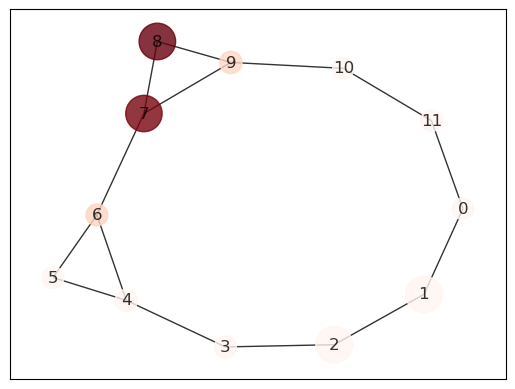

In [43]:
lag = 50

for d in tqdm(range(0, len(X), lag)):
    subset = [j for j in range(d, d+lag)]
    full_bm.add_coloring(pd.DataFrame([1 if i in subset else 0 for i in range(len(X))], columns=['subset']))

    plt.clf() 
    full_bm.draw_networkx(coloring_variable='subset')

    plt.savefig('circle_gif/{}.png'.format(d))

  0%|          | 0/20 [00:00<?, ?it/s]

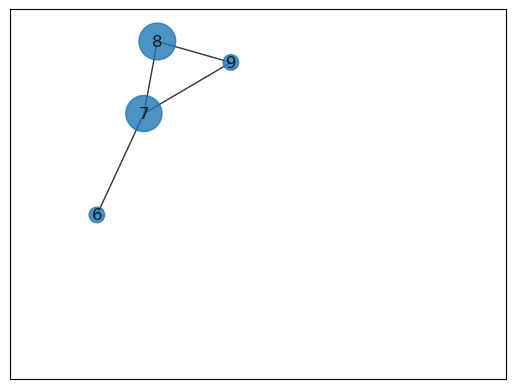

In [44]:
lag = 50

for d in tqdm(range(0, len(X), lag)):
    subset = [j for j in range(d, d+lag)]

    subset_bm = full_bm.filter_by(subset)

    plt.clf() 

    subset_bm.draw_networkx(pos=nx.spring_layout(full_bm.Graph, seed=24),
                            )
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.savefig('circle_sub/{}.png'.format(d))

# Melbourne temperatures

In [ ]:
temps_df = pd.read_csv('data/daily-min-temperatures.csv')
temps_df

## Takens embedding

In [ ]:
from gtda.time_series import SingleTakensEmbedding

In [ ]:
embedding_dim = 14

In [ ]:
TE = SingleTakensEmbedding(time_delay=1, dimension=embedding_dim, parameters_type='fixed')

X = np.array(TE.fit_transform(temps_df.Temp.to_numpy()))

X.shape

In [ ]:
coloring_df = temps_df[['Temp']].rolling(window=embedding_dim, center=False).mean().dropna().reset_index(drop=True)
coloring_df

## BallMapper

In [ ]:
from pyballmapper import BallMapper

In [ ]:
full_bm = BallMapper(X, 13, verbose='tqdm')

In [ ]:
fig, ax = plt.subplots()

full_bm.add_coloring(coloring_df)
full_bm.draw_networkx(coloring_variable='Temp')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [ ]:
lag = 30

for d in tqdm(range(0, len(X)-lag, lag)):
    subset = [j for j in range(d, d+lag)]
    full_bm.add_coloring(pd.DataFrame([1 if i in subset else 0 for i in range(len(X))], columns=['subset']))

    plt.clf() 
    full_bm.draw_networkx(coloring_variable='subset')

    plt.title('from {} to {}'.format(temps_df.Date[d], temps_df.Date[d+lag]))

    plt.savefig('togif/{}.png'.format(d))

In [ ]:
lag = 30

for d in tqdm(range(0, len(X)-lag, lag)):
    subset = [j for j in range(d, d+lag)]

    subset_bm = full_bm.filter_by(subset)

    plt.clf() 

    subset_bm.draw_networkx(pos=nx.spring_layout(full_bm.Graph, seed=24),
                            )
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.title('from {} to {}'.format(temps_df.Date[d], temps_df.Date[d+lag]))

    plt.savefig('bmtogif/{}.png'.format(d))